In [2]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 37.6 MB/s eta 0:00:00 MB/s eta 0:00:0102
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 26.8 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [11]:
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

In [12]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (70000, 784)
Shape of y: (70000,)


In [13]:
random_state = check_random_state(0)
print(f"Random state: {random_state}")

Random state: RandomState(MT19937)


In [14]:
permutation = random_state.permutation(X.shape[0])
print(f"Shape of permutation: {permutation.shape}")

Shape of permutation: (70000,)


In [15]:
X = X[permutation]
y = y[permutation]
print(f"Shape of X: {X.shape}")

Shape of X: (70000, 784)


In [16]:
X = X.reshape((X.shape[0], -1))
print(f"Shape of X: {X.shape}")

Shape of X: (70000, 784)


In [17]:
train_samples = 5000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

In [18]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (5000, 784)
Shape of X_test: (10000, 784)
Shape of y_train: (5000,)
Shape of y_test: (10000,)


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
clf = LogisticRegression(C=50.0 / train_samples,
                         penalty='l1',
                         solver='saga',
                         tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
print(f"Sparsity with L1 penalty: {sparsity:.2f}%")
print(f"Test score with L1 penalty: {score:.4f}")

Sparsity with L1 penalty: 78.80%
Test score with L1 penalty: 0.8304


Text(0.5, 0.98, 'Classification vector for...')

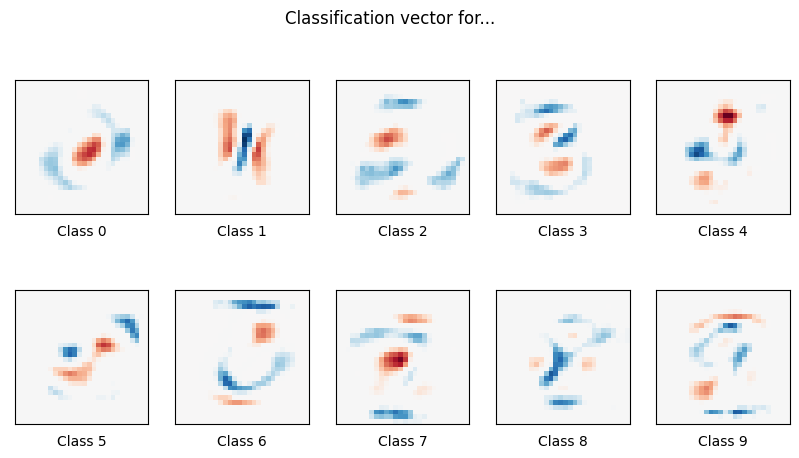

In [26]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i+1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation='nearest',
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel(f"Class {i}")
plt.suptitle("Classification vector for...")